<font size=7> Data 1 - Create Raw Datasets

<font color="orange"> This notebook was create using the code iside the raw_data tutorial 1_processing_raw_data

Here we create raw datasets for further inspection

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import pickle

import braingeneers.data.datasets_electrophysiology as ephys
from human_hip.spike_data import read_autocurated_data,  plot_raster

## <font color="blue"> Look at Spike Data

In [32]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

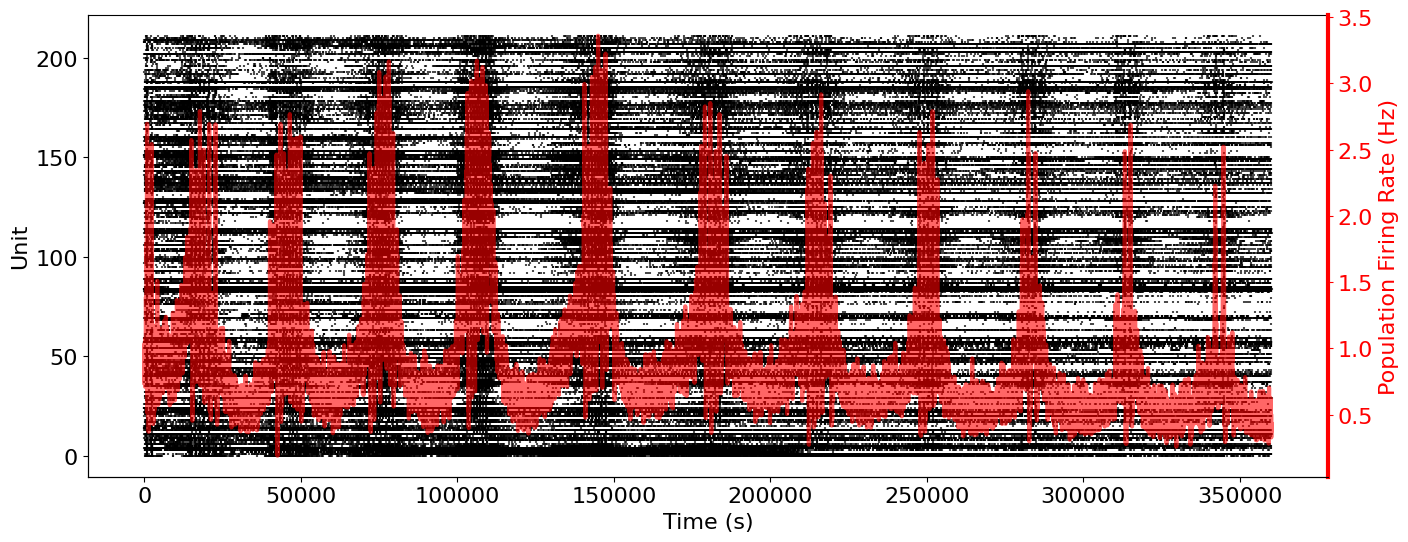

In [5]:
plot_raster( sd, smoothness=20 )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

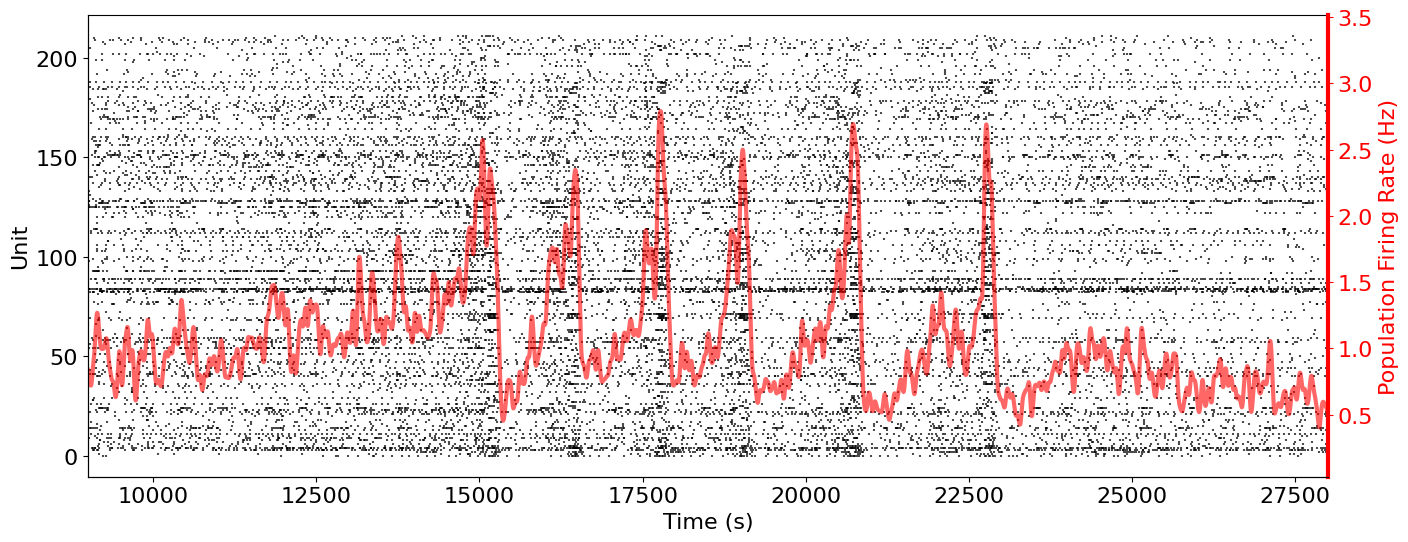

In [33]:
plot_raster( sd, smoothness=20 , xlim=(9000, 28000) )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

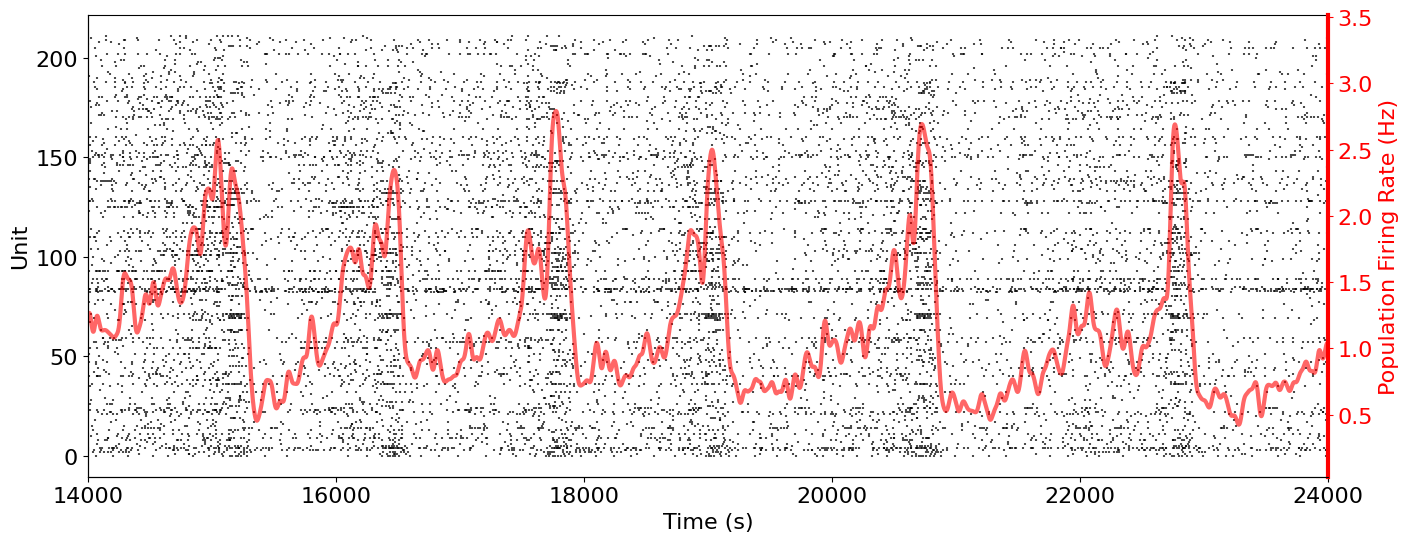

In [8]:
plot_raster( sd, smoothness=20 , xlim=(14000, 24000) )

## Create 9-19s Recording

In [12]:
metadata = ephys.load_metadata("2023-12-03-e-Hc112823_avv9hckcr1")
# find which experiments are bas datasets
for key,val in metadata["ephys_experiments"].items():
    print( key, val["blocks"][0]["path"] )

In [14]:
metadata["ephys_experiments"]["experiment4"]["blocks"][0]["path"]

'original/data/Hc112823_avv9hckcr1_21841_120323_3.raw.h5'

In [15]:
raw_data = ephys.load_data( metadata=metadata, experiment="experiment4", offset=9*20000, length=19*20000, channels=None )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:197: UserWarning: Dataset 2023-12-03-e-Hc112823_avv9hckcr1 is not in row-major format, the parallel data reader can't be used, read speeds may be slow over a network.
  warnings.warn(f'Dataset {batch_uuid} is not in row-major format, the parallel data reader '
/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


In [16]:
raw_data.shape

(1028, 380000)

In [18]:
channel_map = np.array( metadata['ephys_experiments']['experiment4']["mapping"] )

In [21]:
data_down = []  # the variable that will hold the downsambled data
for i in channel_map[:,0].astype(int) : # we gather data for ever channel that was recorded from, (these channels are in the channel map of the metadata)
    data_down.append( signal.decimate( raw_data[i,:], 20 )  ) # we get everyt 20th data point, andthen append it to the data_down variable
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis


In [23]:
del raw_data

In [24]:
to_pickle = {"data": data_down, "xy": channel_map[:,1:3], "frame_rate": 20000/20}

In [26]:
del data_down

In [27]:
to_pickle["data"].shape

(1009, 19000)

In [29]:
with open( '/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid_start9s_stop28s_fs1ms.pkl' , 'wb') as file:
    pickle.dump(to_pickle, file)

In [15]:
# check data shape is correct #len(raw_data) #check the recording is about the right length len(raw_data[0])/20000
raw_data.shape

(1028, 200000)

shape: (887, 4)
channel_id ,  x ,  y ,  ?
[[0.0000e+00 1.2992e+04 2.1000e+02 1.0325e+03]
 [1.0000e+00 1.8347e+04 1.5225e+03 1.4525e+03]
 [2.0000e+00 1.3434e+04 2.4500e+02 1.0675e+03]
 [3.0000e+00 1.8789e+04 1.5575e+03 1.4875e+03]]


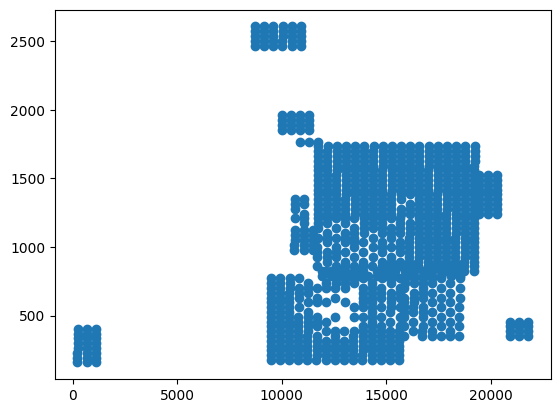

In [18]:
channel_map = np.array( metadata['ephys_experiments']['experiment4']["mapping"] )

print( "shape:", channel_map.shape )
print( "channel_id , ", "x , ", "y , ", "?")
print( channel_map[0:4,:] )
plt.scatter(channel_map[:,1], channel_map[:,2] ) # make a scatterplot of the first and seconds columns of channel_map

In [19]:
data_down = []  # the variable that will hold the downsambled data
for i in channel_map[:,0].astype(int) : # we gather data for ever channel that was recorded from, (these channels are in the channel map of the metadata)
    data_down.append( signal.decimate( raw_data[i,:], 20 )  ) # we get everyt 20th data point, andthen append it to the data_down variable
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

print( "data has ", 20000/20, " frames per second")

to_pickle = {"data": data_down, "xy": channel_map[:,1:3], "frame_rate": 20000/20}

data has  1000.0  frames per second


In [20]:
with open( '/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid_start9s_stop19s_fs1ms.pkl' , 'wb') as file:
    pickle.dump(to_pickle, file)

In [21]:
with open('/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid_start9s_stop19s_fs1ms.pkl', 'rb') as filename:
    checkit = pickle.load(filename)
checkit

{'data': array([[252.12854, 251.2932 , 250.25352, ..., 251.13165, 250.66838,
         250.0838 ],
        [507.08752, 504.05548, 503.25372, ..., 503.26794, 502.91788,
         502.89667],
        [307.4485 , 307.53568, 307.9733 , ..., 302.23892, 301.22192,
         300.64517],
        ...,
        [506.2814 , 505.14948, 504.36752, ..., 503.02252, 503.44556,
         503.70554],
        [508.12622, 508.0486 , 506.29984, ..., 508.20444, 507.22226,
         506.85583],
        [500.0675 , 500.19867, 499.21417, ..., 503.22498, 503.43817,
         503.6795 ]], dtype=float32),
 'xy': array([[12992. ,   210. ],
        [18347. ,  1522.5],
        [13434. ,   245. ],
        ...,
        [12807. ,   822.5],
        [18783. ,  1452.5],
        [16143. ,  1452.5]]),
 'frame_rate': 1000.0}

## Create 14-24s Recording

In [2]:
metadata = ephys.load_metadata("2023-12-03-e-Hc112823_avv9hckcr1")
# find which experiments are bas datasets
for key,val in metadata["ephys_experiments"].items():
    print( key, val["blocks"] )

experiment9 [{'num_frames': 4258800, 'path': 'original/data/Hc112723_hckcr1_21841_120323_csfwashout.raw.h5.raw.h5'}]
experiment7 [{'num_frames': 7802600, 'path': 'original/data/Hc112823_avv9hckcr1_21841_120323_5.raw.h5'}]
experiment3 [{'num_frames': 6263000, 'path': 'original/data/Hc112723_hckcr1_21841_120323_base.raw.h5.raw.h5'}]
experiment1 [{'num_frames': 2531400, 'path': 'original/data/Hc112723_hckcr1_21841_120323_base2.raw.h5'}]
experiment2 [{'num_frames': 4005000, 'path': 'original/data/Hc112823_avv9hckcr1_21841_120323_0.raw.h5'}]
experiment8 [{'num_frames': 6201000, 'path': 'original/data/Hc112823_avv9hckcr1_21841_120323_1.raw.h5'}]
experiment6 [{'num_frames': 6401200, 'path': 'original/data/Hc112823_avv9hckcr1_21841_120323_2.raw.h5'}]
experiment4 [{'num_frames': 7202000, 'path': 'original/data/Hc112823_avv9hckcr1_21841_120323_3.raw.h5'}]
experiment5 [{'num_frames': 7802600, 'path': 'original/data/Hc112823_avv9hckcr1_21841_120323_4.raw.h5'}]


In [3]:
raw_data = ephys.load_data( metadata=metadata, experiment="experiment4", offset=14*20000, length=24*20000, channels=None )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:197: UserWarning: Dataset 2023-12-03-e-Hc112823_avv9hckcr1 is not in row-major format, the parallel data reader can't be used, read speeds may be slow over a network.
  warnings.warn(f'Dataset {batch_uuid} is not in row-major format, the parallel data reader '
/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


In [4]:
# check data shape is correct #len(raw_data) #check the recording is about the right length len(raw_data[0])/20000
raw_data.shape

(1028, 200000)

shape: (887, 4)
channel_id ,  x ,  y ,  ?
[[0.0000e+00 1.2992e+04 2.1000e+02 1.0325e+03]
 [1.0000e+00 1.8347e+04 1.5225e+03 1.4525e+03]
 [2.0000e+00 1.3434e+04 2.4500e+02 1.0675e+03]
 [3.0000e+00 1.8789e+04 1.5575e+03 1.4875e+03]]


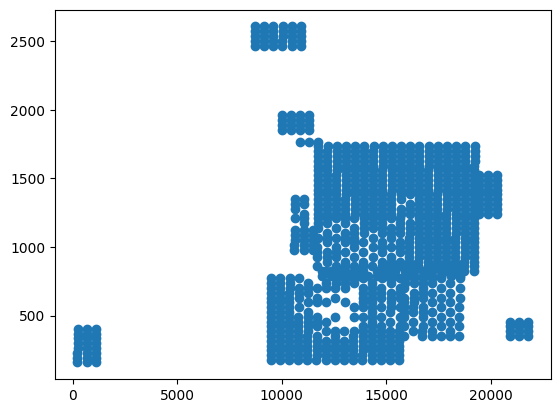

In [5]:
channel_map = np.array( metadata['ephys_experiments']['experiment4']["mapping"] )

print( "shape:", channel_map.shape )
print( "channel_id , ", "x , ", "y , ", "?")
print( channel_map[0:4,:] )
plt.scatter(channel_map[:,1], channel_map[:,2] ) # make a scatterplot of the first and seconds columns of channel_map

In [6]:
data_down = []  # the variable that will hold the downsambled data
for i in channel_map[:,0].astype(int) : # we gather data for ever channel that was recorded from, (these channels are in the channel map of the metadata)
    data_down.append( signal.decimate( raw_data[i,:], 20 )  ) # we get everyt 20th data point, andthen append it to the data_down variable
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

print( "data has ", 20000/20, " frames per second")

to_pickle = {"data": data_down, "xy": channel_map[:,1:3], "frame_rate": 20000/20}

data has  1000.0  frames per second


In [7]:


# with open( '/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/base_start105s_stop115s_fs1ms.pkl' , 'wb') as file:
#     pickle.dump(to_pickle, file)